In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Quadrature rule
n_elem = 200
area_elem = (1/(n_elem-1))
int_p = np.linspace(0, 1, n_elem)
int_w = np.ones(n_elem) * area_elem
int_w[[0, -1]] /= 2
#  End Quadrature rule

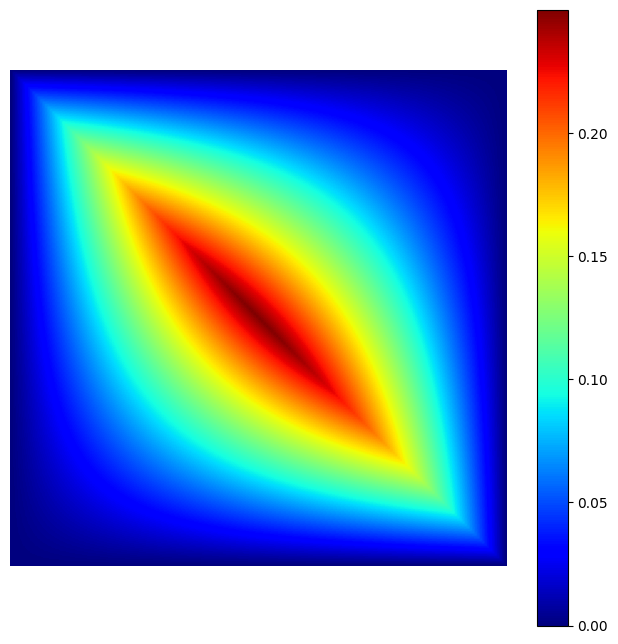

In [3]:
x = np.linspace(0, 1, 200)

X, Y = np.meshgrid(x, x, indexing='xy')

x = X.ravel()
y = Y.ravel()

g = np.zeros_like(x)
cond = x < y
g[cond] = x[cond]*(1-y[cond])
g[~cond] = y[~cond]*(1-x[~cond])

plt.figure(figsize=(8,8))
plt.imshow(g.reshape(200, 200).flip(0), cmap='jet')
plt.axis('off')
plt.colorbar()
plt.savefig('figures/expected_kernel.png', bbox_inches='tight')
plt.show()

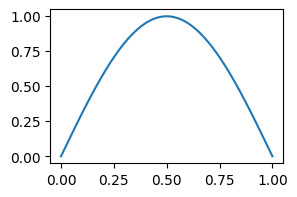

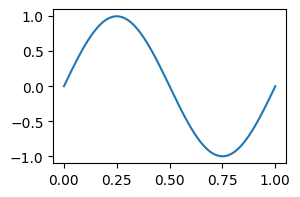

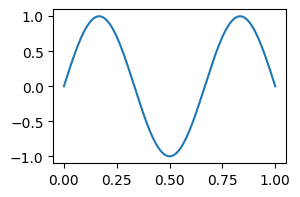

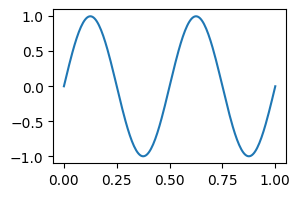

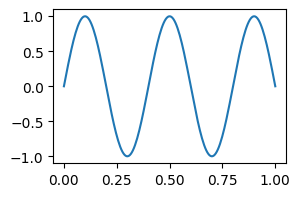

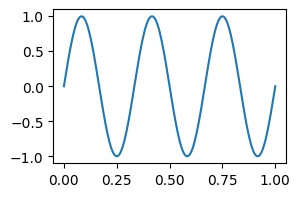

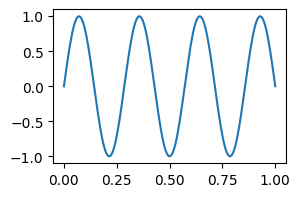

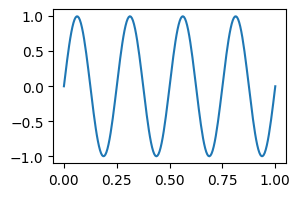

In [4]:
t = np.linspace(0, 1, 200)

BASIS = []
for k in range(1, 9):
    BASIS.append(np.sin(np.pi*k*t))

BASIS = np.array(BASIS)

for i, b in enumerate(BASIS):
    plt.figure(figsize=(3,2))
    plt.plot(t, b)
    plt.savefig(f'figures/expected_basis_{i}.png', bbox_inches='tight')
    plt.show()

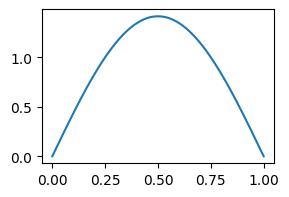

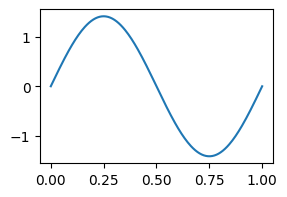

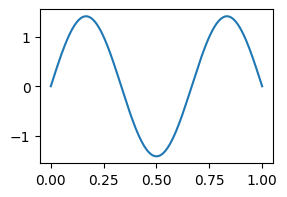

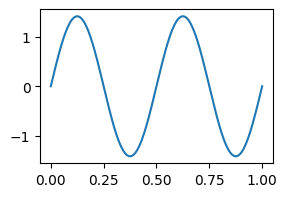

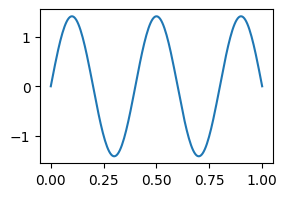

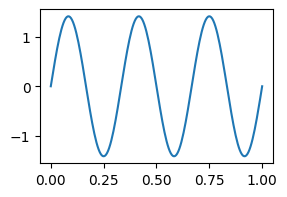

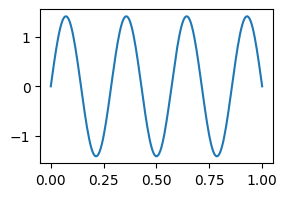

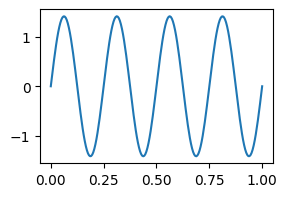

In [5]:
#  Gram-Schmidt
V = BASIS
n = len(V)
Q = [None for _ in range(n)]
R = [[0.0 for __ in range(n)] for _ in range(n)]

for i in range(n):
    R[i][i] = np.sqrt(V[i] * V[i] @ int_w)
    Q[i] = V[i] / R[i][i]
    for j in range(i+1, n):
        R[i][j] = V[j] * Q[i] @ int_w
        if abs(R[i][j]) >= 1e-1:
            V[j] = V[j] - (Q[i] * R[i][j])
#  End Gram-Schmidt

O_BASIS = np.array(Q)
for i, b in enumerate(O_BASIS):
    plt.figure(figsize=(3,2))
    plt.plot(t, b)
    plt.savefig(f'figures/expected_basis_orth_{i}.png', bbox_inches='tight')
    plt.show()

In [6]:
def compute_kernel(BASIS, EIGV):
    s = np.zeros(shape=(8, 200, 200))
    for i in range(len(BASIS)):
        s[i] = np.outer(BASIS[i], BASIS[i]) * EIGV[i]
    
    return np.sum(s, axis=0)

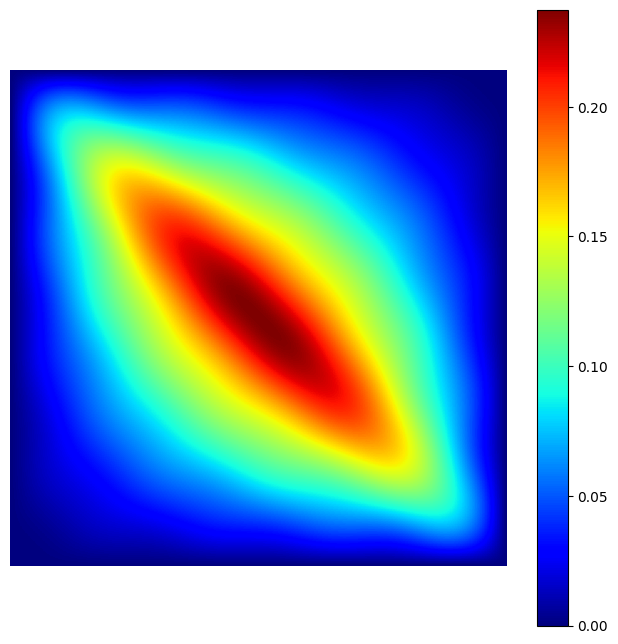

In [7]:
kernel = compute_kernel(O_BASIS, [1/(np.pi*k)**2 for k in range(1, 9)])

plt.figure(figsize=(8,8))
plt.imshow(kernel, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.savefig('figures/expected_kernel_trunc.png', bbox_inches='tight')
plt.show()